In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')
df

,name,smiles
0,caffeine,CN1C=NC2=C1C(=O)N(C(=O)N2C)C
1,mobley_9534740,C([C@@H]1[C@H]([C@@H]([C@H]([C@@H](O1)O)O)O)O)O
2,mobley_4587267,C([C@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O)O
3,mobley_2850833,c1ccc(c(c1)C=O)O
4,mobley_242480,c1ccc2c(c1)C(=O)c3c(ccc(c3C2=O)N)N


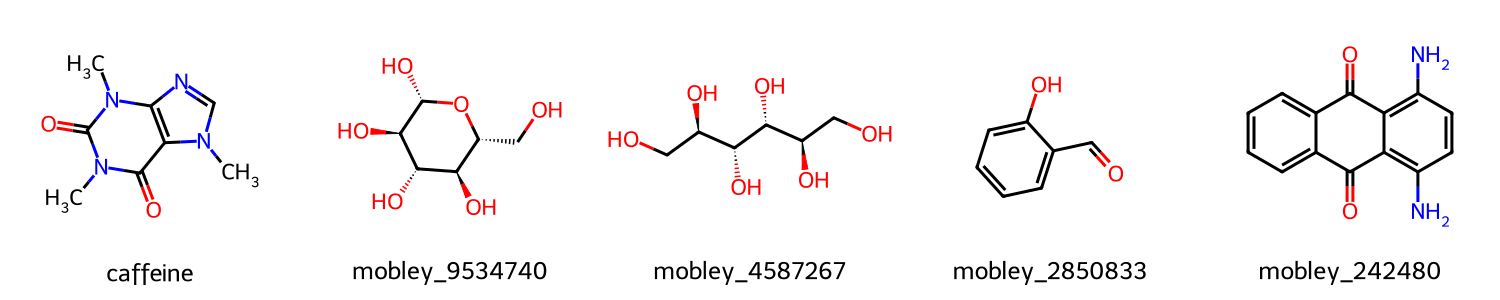

In [3]:
smiles_list = df['smiles'].tolist()
names_list = df['name'].tolist()

molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
draw_options = rdMolDraw2D.MolDrawOptions()
draw_options.explicitMethyl = True  
draw_options.bondLineWidth = 3 
draw_options.fixedFontSize = 22
draw_options.legendFontSize = 24 

svg = Draw.MolsToGridImage(
    molecules, 
    molsPerRow=5, 
    subImgSize=(300, 300), 
    legends=names_list, 
    useSVG=True,
    drawOptions=draw_options
)

with open("molecules_grid.svg", "w") as f:
    f.write(svg.data)

svg